In [26]:
!pip install d2l

     |████████████████████████████████| 83 kB 758 kB/s 


In [49]:
import numpy as np
import torch
import math
from d2l import torch as d2l
from torch import nn

In [50]:
max_degree = 20
train_exp = 100
test_exp = 100
true_w = torch.zeros(20)
true_w[0:4] = torch.tensor([5, 1.2, -3.4, 5.6])
X_pre = torch.normal(0, 1, size=(200, 1))
X = torch.pow(X_pre, torch.arange(20).reshape(1, -1))
for i in range(max_degree):
  X[:, i] /= torch.tensor(math.gamma(i+1))
y_label = torch.matmul(X, true_w.reshape(-1, 1)) + torch.normal(mean=0, std=0.1, size=(X.shape[0], 1))

In [53]:
X.size()

torch.Size([200, 20])

In [52]:
def evaluate_loss(net, data_iter, loss):
  metric = d2l.Accumulator(2)
  for X, y in data_iter:
    y_hat = net(X)
    y = y.reshape(y_hat.shape)
    l = loss(y_hat, y)
    metric.add(l.sum(), l.numel())
  return metric[0] / metric[1]

In [54]:
def train(X_train, y_train, X_test, y_test, epochs = 400):
  loss = nn.MSELoss()
  input_shape = X_train.shape[-1]
  net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
  batch_size = min(10, X_test.shape[0])
  train_iter = d2l.load_array((X_train, y_train.reshape(-1, 1)), batch_size=batch_size, is_train=True)
  test_iter = d2l.load_array((X_test, y_test.reshape(-1, 1)), batch_size=batch_size, is_train=False)
  trainer = torch.optim.SGD(net.parameters(), lr=0.01)
  animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
  for epoch in range(epochs):
    d2l.train_epoch_ch3(net, train_iter, loss, trainer)
    if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(
                net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
  print('weight:', net[0].weight.data.numpy())

weight: [[ 4.9917927  1.2063586 -3.3884525  5.6007266]]


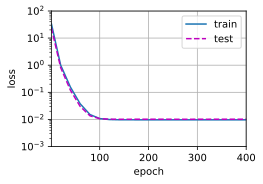

In [55]:
train(X[:train_exp, :4], y_label[:train_exp], X[train_exp:, :4], y_label[train_exp:])